In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
#from google.colab import drive
#drive.mount('/content/drive')

In [3]:
train_data = 'C:\C4.5DecisionTree-master\adult.data'
columns=['age', 'workclass', 'fnlgwt', 'education', 'educationnum', 'maritalstatus', 'occupation', 'relationship',
         'race', 'gender', 'capital-gain', 'capital-loss', 'hours-per-week', 'country', 'income']
adult_data = pd.read_csv(train_data, names = columns)
print("Printing the first 20 tuples of the adult dataset:\n",adult_data.head(20),"\n")


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/adult.data'

In [ ]:
adult_data.drop('fnlgwt', axis = 1, inplace =True)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
for columns in adult_data:
    if adult_data[columns].dtypes == object:
        adult_data[columns] = le.fit_transform(adult_data[columns])

In [ ]:
x=adult_data.iloc[:,0:11]
y=adult_data['income']
print("Features:\n",x,"\n")
print("income Labels:\n",y,"\n")

print("Different income labels present in the wine dataset:",adult_data['income'].unique(),"\n")

print("Labels counts:\n",adult_data.income.value_counts(),"\n")
colnames = list(adult_data.columns)
print("Column names:\n",colnames,"\n")

In [ ]:
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=40)
print("Shape of train and test datasets:\n", x_train, x_test, y_train, y_test,"\n")

In [ ]:
model = DecisionTreeClassifier(criterion = 'entropy', max_depth=3, max_leaf_nodes=7)
model.fit(x_train,y_train)

In [ ]:
attributes= colnames[:11]
income_values=['<=50K','>50K']

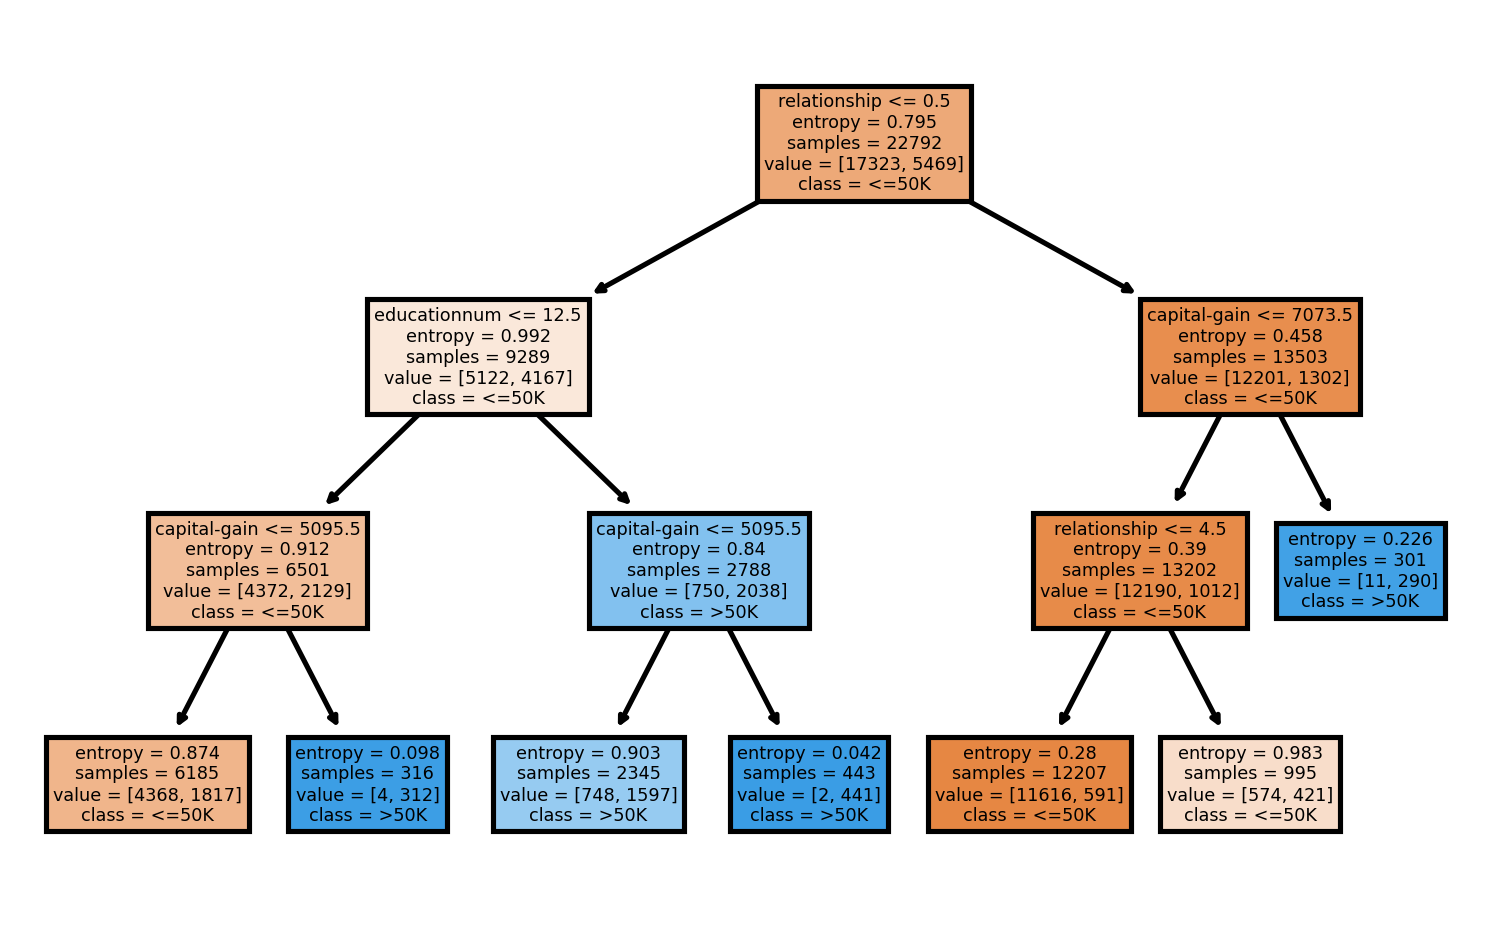

In [ ]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,3), dpi=370)
tree.plot_tree(model,
               feature_names = attributes,
               class_names = income_values,
               filled = True)
plt.show()

In [ ]:
preds = model.predict(x_test)

print("Printing income labels test data value counts\n:",y_test.value_counts(),"\n")

print("Classicfication report:\n",classification_report(y_test,preds))

print("Confusion Matrix:\n",confusion_matrix(y_test,preds))

print("\nAccuracy:",accuracy_score(y_test,preds))

Printing income labels test data value counts
: 0    7397
1    2372
Name: income, dtype: int64 

Classicfication report:
               precision    recall  f1-score   support

           0       0.85      0.95      0.90      7397
           1       0.76      0.47      0.58      2372

    accuracy                           0.83      9769
   macro avg       0.80      0.71      0.74      9769
weighted avg       0.83      0.83      0.82      9769

Confusion Matrix:
 [[7043  354]
 [1268 1104]]

Accuracy: 0.8339645818405159
